In [35]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn import tree
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CleanedEV.csv") 

In [3]:
dataX = df.drop(columns=['HFUEL'])
dataY = df[['HFUEL']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2)

# Naive bays Model

In [5]:
gnb = GaussianNB(priors=None, var_smoothing=1.0)
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)
print(nbModel_grid.score(X_test, y_test))

y_pred = nbModel_grid.predict(X_test) 
print(classification_report(y_test,y_pred))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validati

GaussianNB(var_smoothing=1.0)
0.9799196787148594
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1220
           1       0.00      0.00      0.00        25

    accuracy                           0.98      1245
   macro avg       0.49      0.50      0.49      1245
weighted avg       0.96      0.98      0.97      1245



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pumping the weight by Using SMOTE with Naive bayes

In [6]:
dataX_over = df.drop(columns=['HFUEL'])
dataY_over = df[['HFUEL']]
Over_Sample = SMOTE()
dataX_over , dataY_over = Over_Sample.fit_resample(dataX_over,dataY_over)

In [7]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(dataX_over, dataY_over, test_size = 0.2)

In [8]:
gnb = GaussianNB(priors=None, var_smoothing=1.0)
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=gnb, param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train_over, y_train_over)
print(nbModel_grid.best_estimator_)
print(nbModel_grid.score(X_test_over, y_test_over))

y_pred = nbModel_grid.predict(X_test_over) 
print(classification_report(y_test_over,y_pred))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validati

GaussianNB()
0.5387149917627677
              precision    recall  f1-score   support

           0       0.65      0.17      0.27      1214
           1       0.52      0.91      0.66      1214

    accuracy                           0.54      2428
   macro avg       0.59      0.54      0.46      2428
weighted avg       0.59      0.54      0.46      2428



# Logistic regression model

In [9]:
model_logis1 = LogisticRegression()
classifier = model_logis1.fit(X_train,y_train)



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
ypred_test = model_logis1.predict(X_test)
acc=format(accuracy_score(y_test,ypred_test), "0.2%")
print("Accuracy : ",acc)

Accuracy :  97.99%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[1220    0]
 [  25    0]]


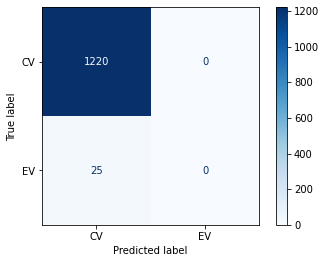

In [11]:
disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=["CV", "EV"], cmap=plt.cm.Blues)
print(disp.confusion_matrix)

In [12]:
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1220
           1       0.00      0.00      0.00        25

    accuracy                           0.98      1245
   macro avg       0.49      0.50      0.49      1245
weighted avg       0.96      0.98      0.97      1245



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

# Pumping the weight by Using SMOTE with Logistic regression

In [13]:
X_oversampling = df.drop(columns=['HFUEL']) #SMOTE
y_oversampling = df[['HFUEL']]
Oversampling = SMOTE()
X_oversampling , y_oversampling = Oversampling.fit_resample(X_oversampling,y_oversampling)

In [14]:
X_trainO, X_testO, y_trainO, y_testO = train_test_split(X_oversampling, y_oversampling, test_size = 0.2)

In [15]:
model_logis2 = LogisticRegression()
classifier = model_logis2.fit(X_trainO,y_trainO)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
ypred_test = model_logis2.predict(X_testO)
acc=format(accuracy_score(y_testO,ypred_test), "0.2%")
print("Accuracy : ",acc)

Accuracy :  50.49%


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[1173   43]
 [1159   53]]


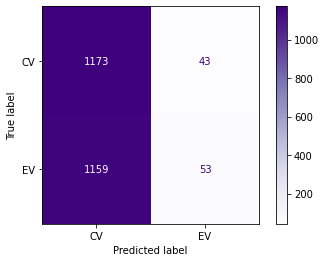

In [17]:
disp = plot_confusion_matrix(classifier, X_testO, y_testO, display_labels=["CV", "EV"], cmap=plt.cm.Purples)
print(disp.confusion_matrix)

In [18]:
print(classification_report(y_testO,ypred_test))

              precision    recall  f1-score   support

           0       0.50      0.96      0.66      1216
           1       0.55      0.04      0.08      1212

    accuracy                           0.50      2428
   macro avg       0.53      0.50      0.37      2428
weighted avg       0.53      0.50      0.37      2428



# Decision tree model

In [19]:
modelClf = DecisionTreeClassifier().fit(dataX, dataY)
for i,j in enumerate(dataX):
  score_f = modelClf.feature_importances_
  print(j, '= ', score_f[i])

Unnamed: 0 =  0.3157026298452724
HHFAMINC =  0.01616606338079647
HOMEOWN =  0.009537545668422166
HHSIZE =  0.03305022968727436
YOUNGCHILD =  0.009351611832865361
HHVEHCNT =  0.05522698242914405
URBRUR =  0.011059800451136503
HTPPOPDN =  0.023321233394152062
PRICE =  0.038244113796324426
PLACE =  0.054947458821590786
R_AGE_IMP =  0.10017898401652768
R_SEX_IMP =  0.008429648949363024
EDUC =  0.06330415743216569
R_RACE =  0.011032027543531695
GT1JBLWK =  0.02088752739156605
OCCAT =  0.013011373087127921
CARSHARE =  0.000559905338929106
TIMETOWK =  0.09906408849547937
YEARMILE =  0.10024130442326869
VEHAGE =  0.016683314015062345


In [20]:
res_pred = modelClf.predict(X_test)
score = accuracy_score(y_test, res_pred)
print(score)
print(classification_report(y_test, res_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1220
           1       1.00      1.00      1.00        25

    accuracy                           1.00      1245
   macro avg       1.00      1.00      1.00      1245
weighted avg       1.00      1.00      1.00      1245



[[1220    0]
 [   0   25]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


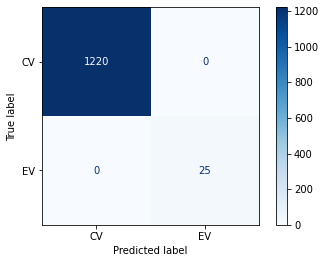

In [34]:
print(confusion_matrix(res_pred , y_test))
plot_confusion_matrix(modelClf, X_test, y_test, display_labels=["CV", "EV"], cmap=plt.cm.Blues)

# Support Vector Machines Model

In [26]:
parameters = {
    'kernel': ['rbf'],
    'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
    'C': [0.001, 0.10, 0.1, 10]
}
cv_svm = GridSearchCV(estimator=svm.SVC(), param_grid=parameters, cv=10, scoring='accuracy')
cv_svm.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validati

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 0.1, 10],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [27]:
print(cv_svm.best_params_)

{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}


In [29]:
y_pred = cv_svm.predict(X_test)  # Predict y_pred using SVM classifier
print(classification_report(y_test,y_pred)) # Compare prediction result between original target and predicted target

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1220
           1       0.00      0.00      0.00        25

    accuracy                           0.98      1245
   macro avg       0.49      0.50      0.49      1245
weighted avg       0.96      0.98      0.97      1245



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

[[1220   25]
 [   0    0]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


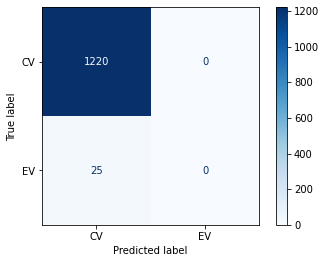

In [30]:
print(confusion_matrix(y_pred, y_test)) # Generating a confusion matrix
plot_confusion_matrix(cv_svm, X_test, y_test, display_labels=["CV", "EV"], cmap=plt.cm.Blues) # Visualizing the confusion matrix

# Linear SVM

In [52]:
lin_svm = svm.SVC(kernel='linear')
lin_svm.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [53]:
y_pred = lin_svm.predict(X_test)  # Predict y_pred using SVM classifier
print(classification_report(y_test,y_pred)) # Compare prediction result between original target and predicted target

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1220
           1       0.00      0.00      0.00        25

    accuracy                           0.98      1245
   macro avg       0.49      0.50      0.49      1245
weighted avg       0.96      0.98      0.97      1245



[[1218   25]
 [   2    0]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


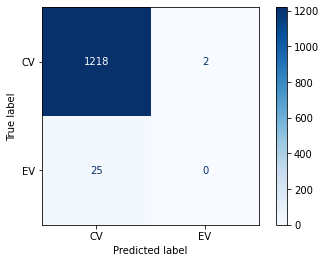

In [54]:
print(confusion_matrix(y_pred, y_test)) # Generating a confusion matrix
plot_confusion_matrix(lin_svm, X_test, y_test, display_labels=["CV", "EV"], cmap=plt.cm.Blues)

# Pumping the weight by Using SMOTE with Support Vector Machines

In [31]:
# define svm as classifier
cv_svm.fit(X_train_over, y_train_over)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validati

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 0.1, 10],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [32]:
y_pred_smote = cv_svm.predict(X_test_over)  # Predict y_pred using SVM classifier
print(classification_report(y_test_over,y_pred_smote)) # Compare prediction result between original target and predicted target

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1214
           1       0.85      0.80      0.82      1214

    accuracy                           0.83      2428
   macro avg       0.83      0.83      0.83      2428
weighted avg       0.83      0.83      0.83      2428



[[933 759]
 [281 455]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


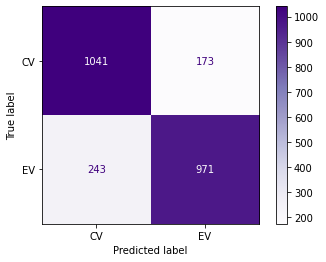

In [59]:
print(confusion_matrix(y_pred_smote, y_test_over)) # Generating a confusion matrix
plot_confusion_matrix(cv_svm, X_test_over, y_test_over, display_labels=["CV", "EV"], cmap=plt.cm.Purples) # Visualizing the confusion matrix

# Pumping the weight by applying SMOTE to Linear SVM

In [ ]:
lin_svm.fit(X_train_over, y_train_over)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
y_pred_smote = lin_svm.predict(X_test_over)  # Predict y_pred using SVM classifier
print(classification_report(y_test_over,y_pred_smote)) # Compare prediction result between original target and predicted target

              precision    recall  f1-score   support

           0       0.55      0.77      0.64      1214
           1       0.62      0.37      0.47      1214

    accuracy                           0.57      2428
   macro avg       0.58      0.57      0.55      2428
weighted avg       0.58      0.57      0.55      2428



[[933 759]
 [281 455]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


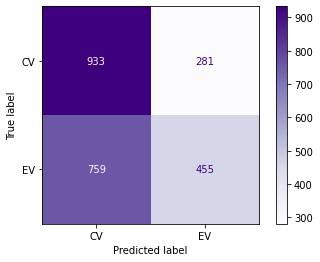

In [ ]:
print(confusion_matrix(y_pred_smote, y_test_over)) # Generating a confusion matrix
plot_confusion_matrix(lin_svm, X_test_over, y_test_over, display_labels=["CV", "EV"], cmap=plt.cm.Purples) # Visualizing the confusion matrix


# ROC-AUC Plot

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in

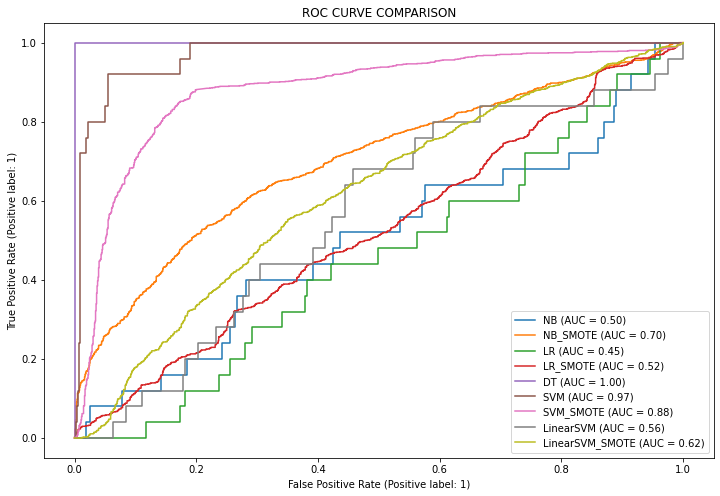

In [71]:
plt.figure(figsize=(12,8))

ax = plt.gca()

# ROC plot of Naive Bayes
plot_roc_curve(nbModel_grid, X_test, y_test, ax=ax, name='NB')

# ROC plot of Naive Bayes which is applied SMOTE
plot_roc_curve(nbModel_grid, X_test_over, y_test_over, ax=ax, name='NB_SMOTE')

# ROC plot of Logistic Regression
plot_roc_curve(model_logis1, X_test, y_test, ax=ax, name='LR')

# ROC plot of Logistic Regression which is applied SMOTE
plot_roc_curve(model_logis2, X_testO, y_testO, ax=ax, name='LR_SMOTE')

# ROC plot of Decision Tree
plot_roc_curve(modelClf, X_test, y_test, ax=ax, name='DT')

# ROC plot of Support Vector Machines
plot_roc_curve(cv_svm, X_test, y_test, ax=ax, name='SVM')

# ROC plot of Support Vector Machines which is applied SMOTE
plot_roc_curve(cv_svm, X_test_over, y_test_over, ax=ax, name='SVM_SMOTE')

# ROC plot of Linear SVM
plot_roc_curve(lin_svm, X_test, y_test, ax=ax, name='LinearSVM')

# ROC plot of Linear SVM which is applied SMOTE
plot_roc_curve(lin_svm, X_test_over, y_test_over, ax=ax, name='LinearSVM_SMOTE')

plt.title("ROC CURVE COMPARISON")
plt.show()